In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

## ViT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 128
NUM_CLASSES=4

In [ ]:
#!pip install split-folders

#import splitfolders

In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/MLHC_Dataset', output="/content/drive/My Drive/MLHC_Dataset_splitted", seed=42, ratio=(0.6, 0.2,0.2)) 

In [ ]:
base_dir  = '/content/drive/My Drive/MLHC_Dataset_splitted'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')



In [ ]:
# Training Data
train_VMD  = os.path.join(train_dir, 'Very_Mild_Demented')
train_MOD     = os.path.join(train_dir, 'Moderate_Demented')
train_MID     = os.path.join(train_dir, 'Mild_Demented')
train_ND     = os.path.join(train_dir, 'Non_Demented')

val_VMD  = os.path.join(validation_dir, 'Very_Mild_Demented')
val_MOD     = os.path.join(validation_dir, 'Moderate_Demented')
val_MID     = os.path.join(validation_dir, 'Mild_Demented')
val_ND     = os.path.join(validation_dir, 'Non_Demented')

test_VMD  = os.path.join(test_dir, 'Very_Mild_Demented')
test_MOD     = os.path.join(test_dir, 'Moderate_Demented')
test_MID     = os.path.join(test_dir, 'Mild_Demented')
test_ND     = os.path.join(test_dir, 'Non_Demented')

print('Total training Very Mild Demented images:', len(os.listdir(train_VMD)))
print('Total training Moderate Demented images:', len(os.listdir(train_MOD)))
print('Total training Mild Demented images:', len(os.listdir(train_MID)))
print('Total training Non Demented images:', len(os.listdir(train_ND)))


print('Total validation Very Mild Demented images:', len(os.listdir(val_VMD)))
print('Total validation Moderate Demented images:', len(os.listdir(val_MOD)))
print('Total validation Mild Demented images:', len(os.listdir(val_MID)))
print('Total validation Non Demented images:', len(os.listdir(val_ND)))

print('Total test Very Mild Demented images:', len(os.listdir(test_VMD)))
print('Total test Moderate Demented images:', len(os.listdir(test_MOD)))
print('Total test Mild Demented images:', len(os.listdir(test_MID)))
print('Total test Non Demented images:', len(os.listdir(test_ND)))



Total training Very Mild Demented images: 1344
Total training Moderate Demented images: 38
Total training Mild Demented images: 537
Total training Non Demented images: 1906
Total validation Very Mild Demented images: 448
Total validation Moderate Demented images: 12
Total validation Mild Demented images: 179
Total validation Non Demented images: 640
Total test Very Mild Demented images: 448
Total test Moderate Demented images: 14
Total test Mild Demented images: 160
Total test Non Demented images: 640


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/My Drive/MLHC_Dataset_splitted'

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')


Found 3825 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
!pip install tensorflow-addons
!pip install tensorflow-datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

In [ ]:
!pip install --quiet vit-keras

from vit_keras import vit

In [ ]:
vit_model = vit.vit_b32(
        image_size = IMG_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 4)

In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()


Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87429888  
                                                                 
 flatten_5 (Flatten)         (None, 768)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 768)              3072      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 16)                12304     
                                                                 
 batch_normalization_9 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 4)          

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications import ResNet50, VGG16
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt

In [ ]:
learning_rate = 1e-4

# Decay=1e-5 deleted here
optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate, decay=1e-5)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = ['accuracy'])

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                                                 patience = 50,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, checkpointer]

history = model.fit(train_generator,
          validation_data = validation_generator,
          epochs = 1000,
          callbacks = callbacks)



Epoch 1/1000
120/120 [==============================] - ETA: 0s - loss: 1.3270 - accuracy: 0.4366 ETA: 0s - loss: 1.3304 
Epoch 00001: val_accuracy improved from -inf to 0.44097, saving model to .\model.hdf5
120/120 [==============================] - 34s 134ms/step - loss: 1.3270 - accuracy: 0.4366 - val_loss: 1.4581 - val_accuracy: 0.4410
Epoch 2/1000
120/120 [==============================] - ETA: 0s - loss: 1.2960 - accuracy: 0.4528 - ETA: 11s - loss: 1.3466 - accuracy: 0. - ETA: 11s - loss - ETA: 9s - loss: 1.3030 - accuracy: 0. - ETA: 8s - loss: 1.3124 - accuracy: 0. - ETA: 8s - loss: 1.3140 - accura - ETA - ETA: 6s - loss: 1.3047 - accura - ETA: 5s - loss: 1.2991 - accu - ETA: 5s - loss: 1.2964 - accuracy:  - ETA: 4s - loss: 1.3040 - accuracy: 0. - ETA: 4s - loss: 1.3104 -  - ETA: 3s - loss: 1.3118 - accu - ETA: 3s - - ETA: 1s - l - ETA: 0s - loss: 1.2991 - accuracy: 
Epoch 00002: val_accuracy did not improve from 0.44097
120/120 [==============================] - 13s 109ms/step 

120/120 [==============================] - ETA: 0s - loss: 1.0035 - accuracy: 0.6026 - ETA: 10s - loss: 1.0169 - accuracy: 0.609 - ETA: - ETA: 3s - los - ETA: 2s - loss: 0.9965 - accuracy:  -
Epoch 00016: val_accuracy did not improve from 0.64113
120/120 [==============================] - 13s 109ms/step - loss: 1.0035 - accuracy: 0.6026 - val_loss: 0.9505 - val_accuracy: 0.6083
Epoch 17/1000
120/120 [==============================] - ETA: 0s - loss: 0.9893 - accuracy: 0.5971
Epoch 00017: val_accuracy did not improve from 0.64113
120/120 [==============================] - 13s 109ms/step - loss: 0.9893 - accuracy: 0.5971 - val_loss: 0.8816 - val_accuracy: 0.6364
Epoch 18/1000
120/120 [==============================] - ETA: 0s - loss: 0.9701 - accuracy: 0.6060 ETA: 2s - loss: 0.9709 -  - E
Epoch 00018: val_accuracy did not improve from 0.64113
120/120 [==============================] - 13s 109ms/step - loss: 0.9701 - accuracy: 0.6060 - val_loss: 0.8827 - val_accuracy: 0.6341
Epoch 19/1000

120/120 [==============================] - ETA: 0s - loss: 0.7452 - accuracy: 0.6933 ETA: 9s - loss: 0.7 - ETA: 8s - loss: 0 - ETA: 5s - loss: 0.7314 - accura - ETA: 4s - loss: 0.7368 - accuracy: 0. - ETA: 4s - loss: 0.7380 - accuracy: 0.69 - ETA: 4s - loss: 0.7382 - accuracy: 0. - ETA: 4s - loss: 0.7399 - accu - ETA: 3s - loss: 0.7431 - accuracy:  - ETA: 3s - loss: 0.7445 - accuracy:  - ETA: 3s - loss: 0.7432 - accuracy: 0. - ETA: 2s - los - ETA: 1s - l
Epoch 00037: val_accuracy improved from 0.71618 to 0.72088, saving model to .\model.hdf5
120/120 [==============================] - 14s 113ms/step - loss: 0.7452 - accuracy: 0.6933 - val_loss: 0.6567 - val_accuracy: 0.7209
Epoch 38/1000
120/120 [==============================] - ETA: 0s - loss: 0.7127 - accuracy: 0.7020 - ETA: 10s - loss: 0.6985 - accuracy - ETA: 9s - loss: 0.7049 - accuracy - ETA: 9s - loss: - ETA: 8s - loss: 0.7107 - accuracy: 0.71 - ETA: 7s - loss: 0.7100 - accu - ETA: 7s - - E - ETA: 1s - los - ETA: 0s - loss: 0.71

Epoch 56/1000
120/120 [==============================] - ETA: 0s - loss: 0.4690 - accuracy: 0.8165 ETA: 0s - loss: 0.4680 - accu
Epoch 00056: val_accuracy did not improve from 0.82017
120/120 [==============================] - 13s 109ms/step - loss: 0.4690 - accuracy: 0.8165 - val_loss: 0.4775 - val_accuracy: 0.8100
Epoch 57/1000
120/120 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.8199
Epoch 00057: val_accuracy did not improve from 0.82017
120/120 [==============================] - 13s 111ms/step - loss: 0.4488 - accuracy: 0.8199 - val_loss: 0.5279 - val_accuracy: 0.7975
Epoch 58/1000
120/120 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.8254
Epoch 00058: val_accuracy improved from 0.82017 to 0.85927, saving model to .\model.hdf5
120/120 [==============================] - 14s 115ms/step - loss: 0.4531 - accuracy: 0.8254 - val_loss: 0.3838 - val_accuracy: 0.8593
Epoch 59/1000
120/120 [==============================] - ETA: 0s - loss:

120/120 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.8931 ETA: 3s - loss: 0.2909 - accuracy:  - ETA: 3s - loss: 0.2878 - accuracy:  - - ETA: 1s - loss: 0
Epoch 00077: val_accuracy did not improve from 0.91790
120/120 [==============================] - 13s 110ms/step - loss: 0.2893 - accuracy: 0.8931 - val_loss: 0.2542 - val_accuracy: 0.9046
Epoch 78/1000
120/120 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9137 - ETA: 10s - loss:  - ETA: 6s - loss: 0.2280 - accuracy - ETA: 6s - loss: 0.2263  - ETA: 5s - loss: - ETA: 4s - loss: 0.2409 - accuracy:  - ETA: 3s - loss: 0.2424 - accuracy: 0.91 - E - ETA: 1s - ETA: 0s - loss: 0.2458 - accuracy: 0.
Epoch 00078: val_accuracy did not improve from 0.91790
120/120 [==============================] - 13s 109ms/step - loss: 0.2484 - accuracy: 0.9137 - val_loss: 0.3769 - val_accuracy: 0.8726
Epoch 79/1000
120/120 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.8986- ETA: 9s 

Epoch 99/1000
120/120 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9354 ETA: 4s - loss: 0.1641 -  - ETA: 3s - loss: 0.1634  - ETA: 2s - loss: 0.1645 - accu
Epoch 00099: val_accuracy did not improve from 0.95074
120/120 [==============================] - 13s 108ms/step - loss: 0.1821 - accuracy: 0.9354 - val_loss: 0.2432 - val_accuracy: 0.9093
Epoch 100/1000
120/120 [==============================] - ETA: 0s - loss: 0.1736 - accuracy: 0.9359 ETA: 1s - loss: 0.1783 - accuracy: 0. - ETA: 1s - loss: 0.1790 - accuracy: 0.93 - ETA: 1s - loss: 0.1782 - accu - ETA: 0s - loss: 0.1768 - accura - ETA: 0s - loss: 0.1737 - accuracy: 0.93
Epoch 00100: val_accuracy did not improve from 0.95074
120/120 [==============================] - 13s 107ms/step - loss: 0.1736 - accuracy: 0.9359 - val_loss: 0.1390 - val_accuracy: 0.9500
Epoch 101/1000
120/120 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9373 ETA: 1s
Epoch 00101: val_accuracy did not improve f

120/120 [==============================] - ETA: 0s - loss: 0.1377 - accuracy: 0.9556
Epoch 00121: val_accuracy did not improve from 0.96403
120/120 [==============================] - 13s 108ms/step - loss: 0.1377 - accuracy: 0.9556 - val_loss: 0.1412 - val_accuracy: 0.9562
Epoch 122/1000
120/120 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9231 ETA: 3s - loss: 0.2235 - accu - ETA: 0s - loss: 0.2125 - accuracy
Epoch 00122: val_accuracy did not improve from 0.96403
120/120 [==============================] - 13s 108ms/step - loss: 0.2102 - accuracy: 0.9231 - val_loss: 0.1737 - val_accuracy: 0.9461
Epoch 123/1000
120/120 [==============================] - ETA: 0s - loss: 0.1240 - accuracy: 0.9571 ETA: 4s - loss: 0.1172 - accuracy: 0. - ETA - ETA: 0s - loss: 0.1239 - accuracy: 0.95
Epoch 00123: val_accuracy did not improve from 0.96403
120/120 [==============================] - 13s 108ms/step - loss: 0.1240 - accuracy: 0.9571 - val_loss: 0.1823 - val_accuracy: 0.9

120/120 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9647 - ETA: 11s - loss: 0.0934 - accuracy: 0.9 - ETA: 11s - loss: 0.1 - ETA: 9s - loss: 0.1233 - accu - ETA: 8s - loss: 0.118 - ETA: 7s - loss: 0.112 - ETA: 6s - loss: 0.1069 - accuracy:  - ETA: 6s - loss: 0.1040 - accuracy:  - ETA: 6s - loss: 0.1 - ETA: 2s - loss: 0.1040 - accu
Epoch 00143: val_accuracy did not improve from 0.97654
120/120 [==============================] - 13s 110ms/step - loss: 0.1174 - accuracy: 0.9647 - val_loss: 0.1192 - val_accuracy: 0.9672
Epoch 144/1000
120/120 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9618 ETA: 9s - loss: 0.1309 - accu - ETA: 4s - loss: 0.1177 - ac - ETA: 3s - loss: 0.1207 -  - ETA: 2s - loss: 0.1208 - accuracy: 0. - ETA: 2s - - ETA: 0s - loss: 0.1203 
Epoch 00144: val_accuracy did not improve from 0.97654
120/120 [==============================] - 13s 109ms/step - loss: 0.1178 - accuracy: 0.9618 - val_loss: 0.1086 - val_accuracy: 0.9

120/120 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9699 ETA: 1s - loss: 0.0922 - accuracy: 0.96 - ETA: 1s - loss: 0.0924 - accura - ETA: 0s - loss: 0.0912 - accuracy: 0. - ETA: 0s - loss: 0.0904 - accuracy: 0. - ETA: 0s - loss: 0.0890 - accu
Epoch 00165: val_accuracy did not improve from 0.98124
120/120 [==============================] - 13s 108ms/step - loss: 0.0904 - accuracy: 0.9699 - val_loss: 0.0921 - val_accuracy: 0.9734
Epoch 166/1000
120/120 [==============================] - ETA: 0s - loss: 0.0768 - accuracy: 0.9749
Epoch 00166: val_accuracy did not improve from 0.98124
120/120 [==============================] - 13s 109ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 0.0901 - val_accuracy: 0.9734
Epoch 167/1000
120/120 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9647 - ETA: 7s - loss: 0.0733 - accu - ETA: 6s - loss: 0.0767 - accuracy: 0.97 - ETA: 6s - loss: 0.0 - ETA:  - ETA: 3s - loss: 0.0940 -  - ETA: 0s - loss: 0

Epoch 188/1000
120/120 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9783 - ETA: 10s - loss: 0.0672 - accuracy - ETA: 9s - loss: 0.0568 - accuracy: 0.98 - ETA: 9s - loss: - ETA: 6s - loss: 0.0 - ETA: 4s - loss: 0.0 - ETA: 3s - loss: 0.0630 - accuracy:  - ETA: 3s - loss: 0.0627 - accu - - ETA: 0s - loss: 0.0664 - ac - ETA: 0s - loss: 0.0657 - accuracy: 0.
Epoch 00188: val_accuracy did not improve from 0.98280
120/120 [==============================] - 13s 109ms/step - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.1308 - val_accuracy: 0.9570
Epoch 189/1000
120/120 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9830 ETA: 2s - loss: 0.0 - ETA: 0s - loss: 0.0560 
Epoch 00189: val_accuracy did not improve from 0.98280
120/120 [==============================] - 13s 111ms/step - loss: 0.0552 - accuracy: 0.9830 - val_loss: 0.1175 - val_accuracy: 0.9609
Epoch 190/1000
120/120 [==============================] - ETA: 0s - loss: 0.0549 - accuracy: 

120/120 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.9692
Epoch 00211: val_accuracy did not improve from 0.98358
120/120 [==============================] - 10s 86ms/step - loss: 0.0926 - accuracy: 0.9692 - val_loss: 0.2084 - val_accuracy: 0.9343
Epoch 212/1000
120/120 [==============================] - ETA: 0s - loss: 0.0857 - accuracy: 0.9697
Epoch 00212: val_accuracy did not improve from 0.98358
120/120 [==============================] - 10s 85ms/step - loss: 0.0857 - accuracy: 0.9697 - val_loss: 0.1295 - val_accuracy: 0.9531
Epoch 213/1000
120/120 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.9807
Epoch 00213: val_accuracy did not improve from 0.98358
120/120 [==============================] - 10s 85ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.0963 - val_accuracy: 0.9711
Epoch 214/1000
120/120 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9793
Epoch 00214: val_accuracy did not improve from 0.98

Epoch 240/1000
120/120 [==============================] - ETA: 0s - loss: 0.0550 - accuracy: 0.9812
Epoch 00240: val_accuracy did not improve from 0.98358
120/120 [==============================] - 11s 89ms/step - loss: 0.0550 - accuracy: 0.9812 - val_loss: 0.0804 - val_accuracy: 0.9812
Epoch 241/1000
120/120 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9793
Epoch 00241: val_accuracy did not improve from 0.98358
120/120 [==============================] - 10s 84ms/step - loss: 0.0580 - accuracy: 0.9793 - val_loss: 0.0989 - val_accuracy: 0.9781
Epoch 242/1000
120/120 [==============================] - ETA: 0s - loss: 0.0545 - accuracy: 0.9841
Epoch 00242: val_accuracy did not improve from 0.98358
120/120 [==============================] - 10s 85ms/step - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.1240 - val_accuracy: 0.9703
Epoch 243/1000
120/120 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9838
Epoch 00243: val_accuracy did not im

In [ ]:
#model.save(data_dir = '/content/drive/My Drive/MLHC_Dataset_splitted/mlhc_vit_model2.h5')

Text(0.5, 1.0, 'Accuracy Evolution')

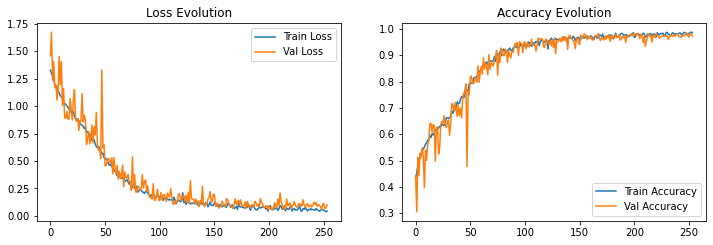

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

Found 1262 images belonging to 4 classes.
40/40 [==============================] - 1s 27ms/step - loss: 0.0534 - accuracy: 0.9857
Test accuracy: 0.9857369065284729
